### Analysis of customer reviews for Titan men watches scraped from Amazon website

In [ ]:
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [ ]:
data=pd.read_csv('/content/Scraping_reviews.csv')

In [ ]:
data.head()

,reviews
0,"\nSuperb watch, the same look like Rado and omega which is used in bond movies, will get in less price.\n"
1,\nbeen using it for 10 days now. so far so good ! i wouldn't recommend it for people with small wrist as the bracelet can't be adjusted to a medium fit ! it's either a little snug or too loose but the product quality and the delivery deserves the praise ! best watch at this price category !\n
2,NaN
3,\nThe watch looks really good but the movement has some problems it skips a few markers and isn't properly aligned. Other than that the crystal feels rather fragile and cheap. The band has its own issues it's a hair ripper and there's only one micro adjustment slot so you're either taking out a full link or 2mm.\n
4,"\nStarting my hunt for a new watch was somewhere in the fossil range but this watch is one of the best buys at half the price of fossil. Looks neat and trust me you will have others asking you from where did you get it. Haven't tested it for the water resistance, but under normal circumstances, it should not give any issues.\n"


In [ ]:
df=data.copy() # Creating a copy of the original data

### Review cleaning

All the reviews have '\n' at the end. Let's remove it.

In [ ]:
# df['reviews'] = df['reviews'].apply(lambda x: x.strip('\n')) # To remove '\n' from every review

In [ ]:
df['reviews'] = df['reviews'].astype(str).apply(lambda x: x.replace('\n', '')) # To remove '\n' from every review

In [ ]:
df.head()

,reviews
0,"Superb watch, the same look like Rado and omega which is used in bond movies, will get in less price."
1,been using it for 10 days now. so far so good ! i wouldn't recommend it for people with small wrist as the bracelet can't be adjusted to a medium fit ! it's either a little snug or too loose but the product quality and the delivery deserves the praise ! best watch at this price category !
2,nan
3,The watch looks really good but the movement has some problems it skips a few markers and isn't properly aligned. Other than that the crystal feels rather fragile and cheap. The band has its own issues it's a hair ripper and there's only one micro adjustment slot so you're either taking out a full link or 2mm.
4,"Starting my hunt for a new watch was somewhere in the fossil range but this watch is one of the best buys at half the price of fossil. Looks neat and trust me you will have others asking you from where did you get it. Haven't tested it for the water resistance, but under normal circumstances, it should not give any issues."


In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
STOPWORDS = stopwords.words("english") #stopwords are the most common unnecessary words. eg is, he, that, etc.

In [ ]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii') # A function to remove emojis from the reviews

In [ ]:
import string   
import re

def clean_text(text):
    ps=PorterStemmer()
    
    text=deEmojify(text) # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
    
    
    return text_cleaned

In [ ]:
df['cleaned_reviews']=df['reviews'].apply(lambda x:clean_text(x))

In [ ]:
df.sample(5)

,reviews,cleaned_reviews
1672,Bed watch,bed watch
1412,Good looking original products of Titan buy it,good look origin product titan buy
3117,Very good product. Gifted to my father. He likes it very much.,good product gift father like much
1168,"very nice Product, look so...beutiful I like it very much super Quality",nice product look sobeuti like much super qualiti
3868,"The quality of the product is very good, it gives you a stunning look on you wrist. I am little disappointed with the delivery as they took almost 10 days to deliver, but overall watch is awesome and the build quality is also brilliant",qualiti product good give stun look wrist littl disappoint deliveri took almost 10 day deliv overal watch awesom build qualiti also brilliant


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Generating a wordcloud to give a view of the words in the reviews based on their frequency of occurence 

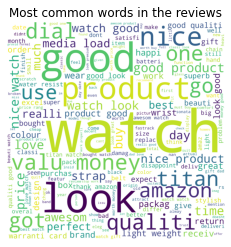

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

### Analyzing the sentiment of reviews using the library 'vader'

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

     |████████████████████████████████| 125 kB 25.4 MB/s 


Defining a function to find the sentiment of a review. It will return a dictionary having positive, negative and compound scores.

In [ ]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

Defining a function to extract only the compound score.

In [ ]:
def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound'] # returns the compound score from the dictionary

In [ ]:
df['sentiment_score']=df['reviews'].apply(lambda x:compound_score(x)) # applying on the reviews column to get the score

In [ ]:
df.sample(5)

,reviews,cleaned_reviews,sentiment_score,review_category
4177,"The media could not be loaded. Bought this watch for Rs. 1800 approx... Nd at this price its a really good deal... I did water rafting while wearing the same, no complaints as of now... Strap material is good, light weight, finishing is also very good, plus black nd red combination looks amazing... I like it...",media could load bought watch rs 1800 approx nd price realli good deal water raft wear complaint strap materi good light weight finish also good plu black nd red combin look amaz like,0.9505,positive
200,I did not receive titan watch. Received a duplicate low grade used and broken watch.,receiv titan watch receiv duplic low grade use broken watch,-0.6369,negative
3153,good watch for formal look. and brand serves you all you want. good product,good watch formal look brand serv want good product,0.7269,positive
4256,An ordinary watch.,ordinari watch,0.0000,neutral
2723,I think this one is rejected piece I bought deeply unsatisfied. Even I had used after 3 months the colour is faded.,think one reject piec bought deepli unsatisfi even use 3 month colour fade,-0.7425,negative


We have got the sentiment score. Now categorizing the reviews based on the score into postive, negative and neutral using the below conditions.

In [ ]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [ ]:
df['review_category']=df['sentiment_score'].apply(lambda x:sentiment_category(x))

In [ ]:
df.sample(5)

,reviews,cleaned_reviews,sentiment_score,review_category
2932,"Superb watch , like the built . However one concern as alarm duration is only 20 second even it is written as one minute in instructions manual, sent an email to customer care, waiting for responseAlarm volume is enough, backlight is also good",superb watch like built howev one concern alarm durat 20 second even written one minut instruct manual sent email custom care wait responsealarm volum enough backlight also good,0.8834,positive
1425,"Gifted to my dad, and he loved this watch.",gift dad love watch,0.5994,positive
4136,Value for money good watch,valu money good watch,0.6486,positive
473,"Good brand gives good product in most cases, as is the case here",good brand give good product case case,0.7003,positive
2405,Bill receipt not received..,bill receipt receiv,0.0000,neutral


#### Plotting a distribution of the review categories

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Reviews Category')

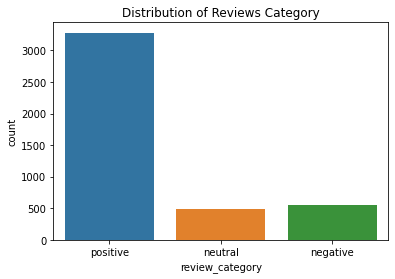

In [ ]:
sns.countplot(df['review_category']).set_title("Distribution of Reviews Category")

In [ ]:
positive_reviews=df.loc[df['review_category']=='positive','cleaned_reviews'].tolist() # extracting all positive reviews and converting to a list
positive_reviews[0:5]

['superb watch look like rado omega use bond movi get less price',
 'use 10 day far good wouldnt recommend peopl small wrist bracelet cant adjust medium fit either littl snug loos product qualiti deliveri deserv prais best watch price categori ',
 'start hunt new watch somewher fossil rang watch one best buy half price fossil look neat trust other ask get havent test water resist normal circumst give issu',
 'smooth simplist yet eleg function one beauti men watch watch isnt lagr small perfect steel band bit larg easili adjust clocksmith packag nice come box warranti card',
 'dial awesom lookfr first time onlin product look better shown pictureit ador chain b littl flat']

In [ ]:
negative_reviews=df.loc[df['review_category']=='negative','cleaned_reviews'].tolist() # extracting all negative reviews and converting to a list
negative_reviews[0:5]

['watch look realli good movement problem skip marker isnt properli align crystal feel rather fragil cheap band issu hair ripper there one micro adjust slot your either take full link 2mm',
 'watch look realli good movement problem skip marker isnt properli align crystal feel rather fragil cheap band issu hair ripper there one micro adjust slot your either take full link 2mm',
 'day second quit small clearli visibl',
 'watch good look chain good watch dial premium chain width small premium',
 'worst product ever got damag watch']

#### Generating wordclouds separately for positive and negative reviews

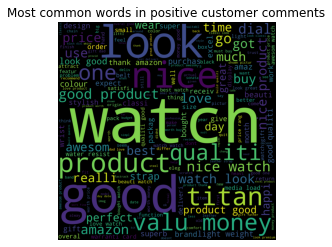

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='positive','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in positive customer comments")
plt.axis('off')
plt.show()

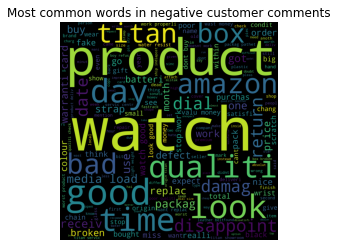

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='negative','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in negative customer comments")
plt.axis('off')
plt.show()

### Unigrams

Unigrams are just individual words

In [ ]:
from collections import Counter

Defining a function to get the most common words

In [ ]:
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn) # return words with the highest frequencies

In [ ]:
top_20_positive_review_words=getMostCommon(positive_reviews,20)

In [ ]:
top_20_positive_review_words

[('watch', 1912),
 ('good', 1301),
 ('look', 1016),
 ('product', 978),
 ('nice', 681),
 ('like', 443),
 ('qualiti', 394),
 ('dial', 349),
 ('price', 348),
 ('titan', 300),
 ('love', 297),
 ('money', 278),
 ('gift', 266),
 ('amazon', 265),
 ('', 258),
 ('valu', 252),
 ('awesom', 245),
 ('one', 244),
 ('buy', 243),
 ('time', 230)]

In [ ]:
top_20_negative_review_words=getMostCommon(negative_reviews,20)

In [ ]:
top_20_negative_review_words

[('watch', 366),
 ('product', 246),
 ('good', 142),
 ('look', 101),
 ('qualiti', 97),
 ('day', 86),
 ('titan', 86),
 ('work', 86),
 ('time', 80),
 ('', 71),
 ('box', 70),
 ('like', 65),
 ('bad', 64),
 ('replac', 63),
 ('amazon', 62),
 ('dial', 61),
 ('buy', 59),
 ('return', 58),
 ('disappoint', 55),
 ('use', 55)]

Defining a function to produce a barplot of the most common words

In [ ]:
def plotMostCommonWords(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

Using the above function, to produce barplots for positive and negative reviews separately

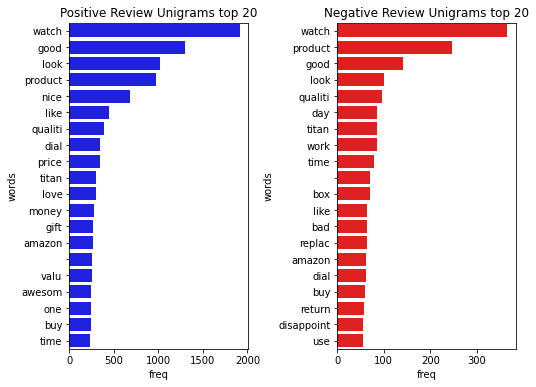

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews,20,"Positive Review Unigrams",axis=ax[0])

plotMostCommonWords(negative_reviews,20,"Negative Review Unigrams",color="red",axis=ax[1])


#### A unigram will not give us a clear understanding as to what is the customer trying to tell. Hence, we use bigrams.

### Bigrams

Bigrams are a combination of 2 words

Defining a function to create n-grams. It can be a combination of 2,3,4 or more words. This number can be given as an input to the function argument.

In [ ]:
def generateNGram(text,n):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

Creating bigrams for postive and negative reviews separately.

In [ ]:
positive_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in positive_reviews]
negative_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in negative_reviews]

In [ ]:
positive_reviews_bigrams[:5]

['superb_watch watch_look look_like like_rado rado_omega omega_use use_bond bond_movi movi_get get_less less_price',
 'use_10 10_day day_far far_good good_wouldnt wouldnt_recommend recommend_peopl peopl_small small_wrist wrist_bracelet bracelet_cant cant_adjust adjust_medium medium_fit fit_either either_littl littl_snug snug_loos loos_product product_qualiti qualiti_deliveri deliveri_deserv deserv_prais prais_best best_watch watch_price price_categori categori_',
 'start_hunt hunt_new new_watch watch_somewher somewher_fossil fossil_rang rang_watch watch_one one_best best_buy buy_half half_price price_fossil fossil_look look_neat neat_trust trust_other other_ask ask_get get_havent havent_test test_water water_resist resist_normal normal_circumst circumst_give give_issu',
 'smooth_simplist simplist_yet yet_eleg eleg_function function_one one_beauti beauti_men men_watch watch_watch watch_isnt isnt_lagr lagr_small small_perfect perfect_steel steel_band band_bit bit_larg larg_easili easili_

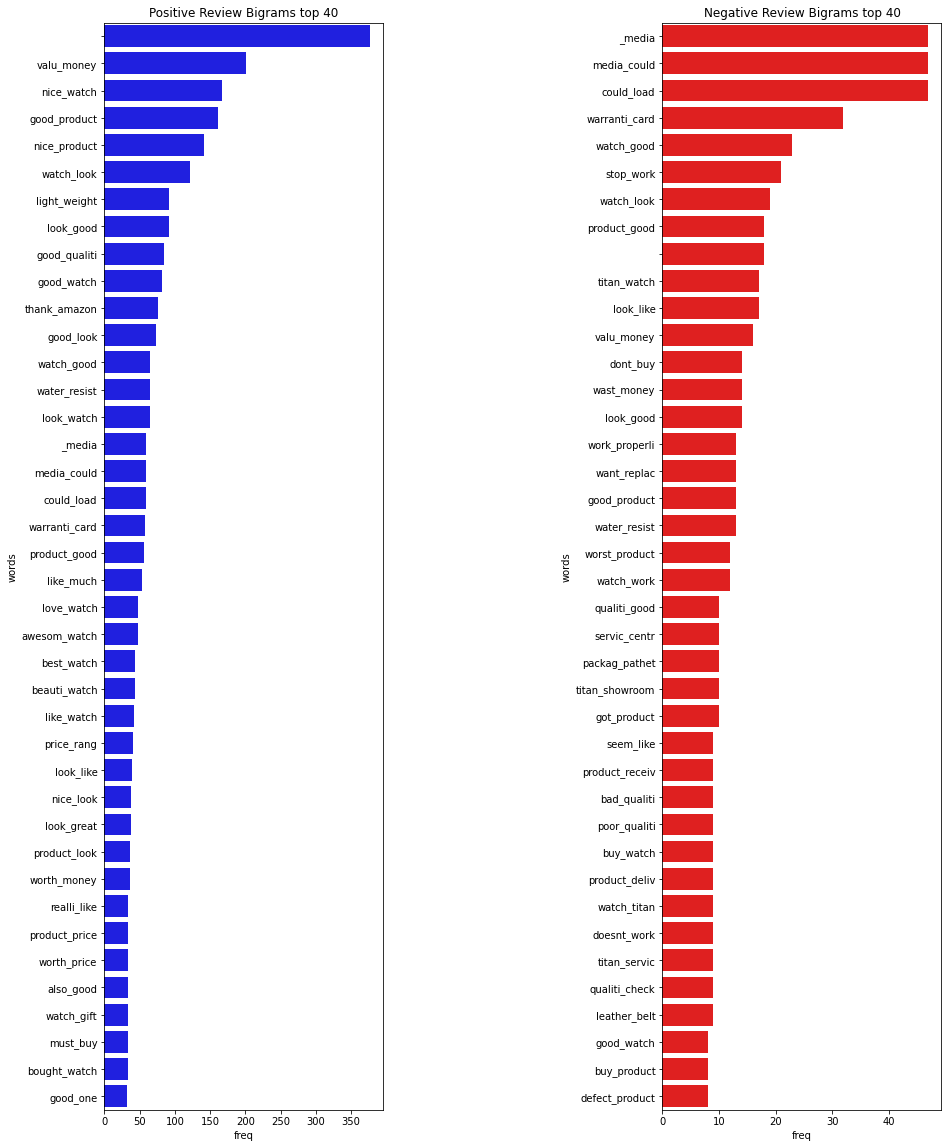

In [ ]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
plotMostCommonWords(positive_reviews_bigrams,40,"Positive Review Bigrams",axis=ax[0])

plotMostCommonWords(negative_reviews_bigrams,40,"Negative Review Bigrams",color="red",axis=ax[1])

From the above barplot, we can see that the most common bigrams in positive reviews are good_product, nice_watch, value_money, good_look, etc.
The most common bigrams in negative reviews are warranty_card, stop_work, worst_product, dont_buy, poor_quality, etc.